# Atelier  : ANOVA

les noms  : 
1. OISSAFE Imad 
2. LATRACH EL Habib
3. ENNASTY Hamza

`jeu de données`:

Le jeu de données "iris" concerne la mesure de différentes caractéristiques de fleurs d'iris de trois espèces différentes. Les caractéristiques mesurées comprennent la longueur et la largeur des sépales et des pétales, ainsi que l'identification de l'espèce d'iris correspondante.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

## Partie 1 : ANOVA à un facteur avec repetetion

In [26]:
# read the data from the excel file
df = pd.read_excel('data.xlsx')


In [27]:
df.head()

,Year_0,Year_5,Year_10,Year_15
0,74,79,71,78
1,74,74,80,81
2,78,77,81,77
3,75,76,75,83
4,70,80,76,79


Verification de normalité

In [28]:
from scipy.stats import shapiro

for column in df.columns:
    stat, p = shapiro(df[column])
    print(f"Results for {column}: Statistics={stat}, p={p}")

Results for Year_0: Statistics=0.9723070859909058, p=0.60403972864151
Results for Year_5: Statistics=0.9618178606033325, p=0.34446218609809875
Results for Year_10: Statistics=0.9644396305084229, p=0.4000464677810669
Results for Year_15: Statistics=0.9719657301902771, p=0.5942472219467163


Verification d'homogénéite de la variance


In [29]:
from scipy.stats import levene

stat, p = levene(df['Year_0'], df['Year_5'], df['Year_10'], df['Year_15'])
print(f"Results for Levene's test: Statistics={stat}, p={p}")

if p > 0.05:
    print("Equal variances")
else:
    print("Unequal variances")
    

Results for Levene's test: Statistics=2.8859992712698137, p=0.03867689723943712
Unequal variances


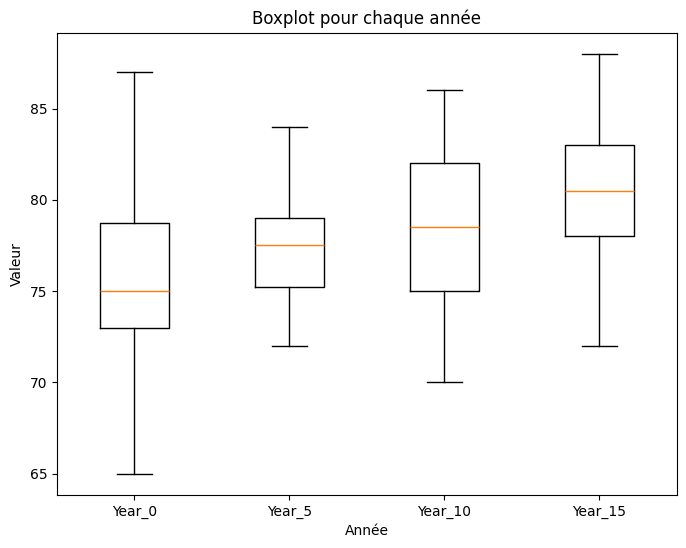

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir le DataFrame de format large à format long
df_melt = df.melt(var_name='Year', value_name='Value')

# Tracer le boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df_melt['Value'][df_melt['Year'] == year] for year in df_melt['Year'].unique()], labels=df_melt['Year'].unique())
plt.title('Boxplot pour chaque année')
plt.xlabel('Année')
plt.ylabel('Valeur')
plt.show()

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Melt DataFrame from wide format to long format
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Year_0', 'Year_5', 'Year_10', 'Year_15'])
df_melt.columns = ['index', 'treatments', 'value']

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                    sum_sq     df         F    PR(>F)
C(treatments)   399.691667    3.0  7.609051  0.000109
Residual       2031.100000  116.0       NaN       NaN
